### **A1.1 Aprendizaje estadístico-automático**

**1.** En el bloque de código se importa el archivo *"A1.1 Obesidad"* al espacio de trabajo con la función **read_csv()** y se imprimen las primeras 10 filas para asegurar que el archivo se haya cargado correctamente, con la función **head(10)**.




In [ ]:
import pandas as pd
ob = pd.read_csv("A1.1 Obesidad.csv")
print(ob.head(10))
print("Cantidad de filas:", ob.shape[0])

     Sexo  Edad  Estatura  Peso FamiliarConSobrepeso ComeMuchasCalorias  \
0  Female  21.0      1.62  64.0                  yes                 no   
1  Female  21.0      1.52  56.0                  yes                 no   
2    Male  23.0      1.80  77.0                  yes                 no   
3    Male  27.0      1.80  87.0                   no                 no   
4    Male  22.0      1.78  89.8                   no                 no   
5    Male  29.0      1.62  53.0                   no                yes   
6  Female  23.0      1.50  55.0                  yes                yes   
7    Male  22.0      1.64  53.0                   no                 no   
8    Male  24.0      1.78  64.0                  yes                yes   
9    Male  22.0      1.72  68.0                  yes                yes   

   ComeVegetales Fumador  ConsumoDeAgua      NivelDeObesidad  
0            2.0      no            2.0        Normal_Weight  
1            3.0     yes            3.0        N

La base de datos tiene un total de **2111 filas**. Además, tiene **10 columnas**: Sexo, Edad, Estatura, Peso, FamiliarConSobrepeso, ComeMuchasCalorias, ComeVegetales, Fumador, ConsumoDeAgua y NivelDeObesidad.  
Algo importante recalcar es que no se especifica la cantidad de calorías que se consideran como "muchas" ni en qué unidad de medida están los valores en la columna de "ConsumoDeAgua".
Además, los datos no parecen estar organizados en ninguna categoría (*i.e., edad en orden ascendente*).   
Tomando en cuenta los primeros 10 datos que se muestran se podría decir que la mayoría de las personas de esta muestra tienen un peso normal, la mayoría de las personas consumen 2 unidades de agua y no fuman. Las 2 personas que tienen algún nivel de obesidad no tienen familiares  con sobrepeso, por lo que podría indicar que no hay una correlación entre estos dos factores.  
Sin embargo, tomar sólo 10 datos es una muestra muy pequeña para llegar a esas conclusiones.   


---



**2.** Una variable que agregaría si formara parte del equipo de investigación sería:  

**Porcentaje de grasa corporal**, la cual es una variable **cuantitativa**.

Agregaría esta variable (PGC) porque de acuerdo con Dávila-Batista et al. (2015) los valores de PGC entre **20% y 25%** y **30% y 35%**, indican sobrepeso, mientras que valores **mayores a 25% y 35%** indican obesidad, para hombres y mujeres, respectivamente.  
Debido a esto considero que agregar esta variable al estudio podría contribuir a una mejor distinción entre la relación del peso y nivel de obesidad contra el PGC y el nivel de obesidad, ya que muchas veces el peso se ve afectado por la densidad muscular y puede ser un falso indicador de sobrepeso.


---

**3.** Si se me solicitara hacer un estudio de inferencia utilizaría **FamilairConSobrepeso** como vairable de salida, siendo una ésta una variable **cualitativa**.  
utilizaría esta variable debido a que me interesa conocer qué tan determinante podría llegar a ser el factor de la genética en temas del nivel de sobrepeso.  
En el siguiente bloque de código se hace un conteo de todas las personas que en la casilla de **FamiliarConSobrepeso** marcaron *yes* y que además en la casilla de **NivelDeObesidad** tengan un valor diferente a *Normal_Weight* y *Insufficient_Weight*. Además, se hará un conteo de la cantidad de personas con obesidad o sobrepeso para poder hacer una comparación entre cuántas personas de las que están dentro de esta categoría también cumplen con que tienen un familiar con sobrepeso. Para hacer este cálculo se importa la librería `numpy` y se utiliza la función de **np.sum()**, uno diferente para cada conteo. Además se usa la condición lógica **&** (y) para que se sumen las filas que cumplan con las condiciones establecidas (`FamiliarConSobrepeso == "yes"`, `NivelDeObesidad != "Normal_Weight`, `NivelDeObesidad != Insufficient_Weight`).




In [ ]:
import numpy as np

total_fam = np.sum(np.where((ob["FamiliarConSobrepeso"] == "yes") & (ob["NivelDeObesidad"] != "Normal_Weight") & (ob["NivelDeObesidad"] != "Insufficient_Weight"), 1, 0))
print("Cantidad de personas con sobrepeso/obesidad con familiares con sobrepeso:", total_fam)
total_o_s = np.sum(np.where((ob["NivelDeObesidad"]!= "Normal_Weight") & (ob["NivelDeObesidad"] != "Insufficient_Weight"), 1, 0))
print("Cantidad de personas con sobrepeso/obesidad", total_o_s)

Cantidad de personas con sobrepeso/obesidad con familiares con sobrepeso: 1445
Cantidad de personas con sobrepeso/obesidad 1552


De las 1,552 personas con algún tipo de sobrepeso u obesidad en esta base de datos, 1,445 tienen un familiar con sobrepeso. Este alto porcentaje, cercano al 100%, indica que existe un factor importante a estudiar, ya que, además de la genética, el entorno familiar podría influir significativamente: vivir en la misma casa y compartir hábitos alimenticios y de actividad física puede contribuir a estas categorías de peso.


---

**4.** Para hacer un análisis gráfico se seleccionó a la subpoblación **masculina**. En el siguiente bloque de código se muestra el proceso para utilizar a esta parte de la población. Se aplica la condición *== Male* sobre la columna *Sexo* (*i.e.*, `ob.Sexo == "Male#`)

En el **eje X** se utiliza **Peso**, la cual es la variable cuantitativa, mientras que en el **eje Y** se utiliza la variable **FamiliarConSobrepeso**, que se analizó en el bloque anterior.

Para poder crear uina gráfica se importó la librería `matplotlib.pyplot`.
Posteriormente se filtró la base de datos a sólo los hombres usando el comando `ob.query("Sexo == 'Male'")`.   
Ya que se tienen filtrados los datos a sólo los de *Male* se guardan en variables para los 2 ejes los valores del peso y si la persona tiene familiar con sobrepeso o no.  
Por último, con estas 2 nuevas variables se utiliza la función **plt.subplot()** para graficar estas 2 variables.


Text(0.5, 1.0, 'Peso vs familiar con sobrepeso (Hombres)')

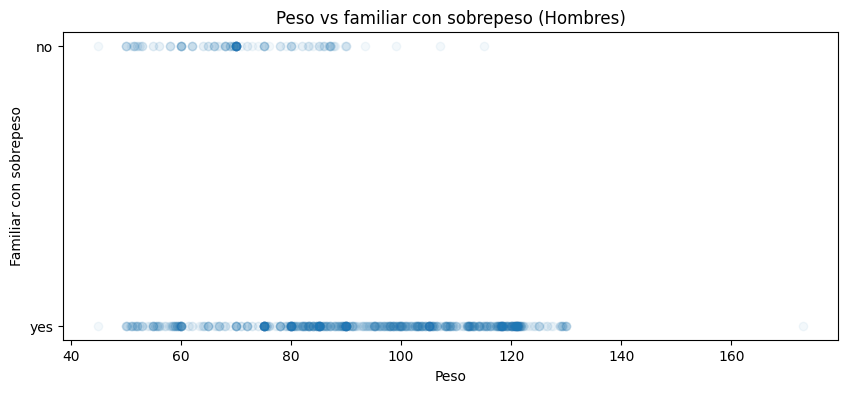

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

# Separar datos
male_ob = ob.query("Sexo == 'Male'")

ob_x = male_ob["Peso"]
ob_y = male_ob["FamiliarConSobrepeso"]

# Graficar
fig, ax = plt.subplots(figsize=(10, 4))
ax.scatter(ob_x, ob_y, alpha=0.05)

ax.set_xlabel("Peso")
ax.set_ylabel("Familiar con sobrepeso")
ax.set_title("Peso vs familiar con sobrepeso (Hombres)")

Con esta gráfica se puede observar que la mayoría de las personas con familiares con sobrepeso tienen un peso mayor a 80kg. De las personas que no tienen familiares con sobrepeso, sólo unas cuantas tienen un peso mayor a 90kg, ya que la mayoría de estas personas tienen un peso rondando los 70kg. Algo relevante a comentar es que también hay una importante cantidad de personas con familiares con sobrepeso que pesan menos de 80kg, lo que revela que no siempre el tener un familiar con sobrepeso indica que la persona también vaya a padecerlo. Esto lleva a pensar que los hábitos saludables y una vida activa puede tener un gran impacto en la salud física y el peso de una persona, incluso tomando en cuenta la genética.


---



**Referencias**
* Dávila-Batista, V., Gómez-Ambrosi, J., Fernández-Villa, T., Molina, A. J., Frühbeck, G., & Martín, V. (2015). Escala colorimétrica del porcentaje de grasa corporal según el estimador de adiposidad CUN-BAE. Atención Primaria, 48(6), 422–423. https://doi.org/10.1016/j.aprim.2015.09.003

**Código de Honor**: Doy mi palabra que he realizado esta actividad con integridad académica.  

Se implementó el uso de IA unicamente para dudas de redacción y código.